# How to Crawling Fred Big Data in a Rapid and Methodical Way

Author: Yadong Zhang

Date: 9-28-2018

E-main: ydup@foxmail.com

## What is Fred?

<img src="../img/FRED.png"  alt="fred" />

> [FRED](https://fred.stlouisfed.org/): Download, graph, and track 527,000 US and international time series from 87 sources.
 
The data can be obtained by Tag, Category, Release, Source, Release Calendar. And there are many tools / [APIs](https://research.stlouisfed.org/docs/api/fred/) for you to crawl the data, such as [fredapi](https://github.com/mortada/fredapi) of python. And in this notebook, I will show you how to use fredapi with python to download the fred data in a rapid and methodical way. Let's go : )

## A Basic Test for the FredAPI
Firstly, let's try to download a kind of series data with the help of [FredAPI](https://github.com/mortada/fredapi) :)

### Install fredapi with Pip and Register to Get a API Key

In [3]:
from fredapi import Fred
fred = Fred(api_key='APIkey')

### Download Data with its Series ID

In [126]:
import matplotlib.pyplot as plt

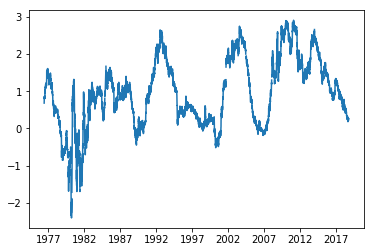

In [5]:
data = fred.get_series('T10Y2Y')
plt.plot(data)

In [6]:
# Get the series information
fred.get_series_info('T10Y2Y')

frequency                                                                Daily
frequency_short                                                              D
id                                                                      T10Y2Y
last_updated                                            2018-09-27 15:51:16-05
notes                        Series is calculated as the spread between 10-...
observation_end                                                     2018-09-26
observation_start                                                   1976-06-01
popularity                                                                 100
realtime_end                                                        2018-09-28
realtime_start                                                      2018-09-28
seasonal_adjustment                                    Not Seasonally Adjusted
seasonal_adjustment_short                                                  NSA
title                        10-Year Treasury Consta

### Download Data with its Catogory
You can choose a category index and then search the most popular series, and any item of the table can be download with its _series id_.

But here, you may be confused about the category index. How do I know the meaning of the index? 
Don't worry. I will solve this for you in the next section : )

In [7]:
fred.search_by_category(33058, limit=10, order_by='popularity', sort_order='desc')

,frequency,frequency_short,id,last_updated,notes,observation_end,observation_start,popularity,realtime_end,realtime_start,seasonal_adjustment,seasonal_adjustment_short,title,units,units_short
series id,,,,,,,,,,,,,,,
TERMCBAUTO48NS,Monthly,M,TERMCBAUTO48NS,2018-07-09 19:51:02,"For further information, please refer to the B...",2018-05-01,1972-02-01,66,2018-09-28,2018-09-28,Not Seasonally Adjusted,NSA,Finance Rate on Consumer Installment Loans at ...,Percent,%
RIFLPBCIANM60NM,Monthly,M,RIFLPBCIANM60NM,2018-07-09 20:01:02,"For further information, please refer to the B...",2018-05-01,2006-08-01,52,2018-09-28,2018-09-28,Not Seasonally Adjusted,NSA,Finance Rate on Consumer Installment Loans at ...,Percent,%
TERMAFCNCNSA,Monthly,M,TERMAFCNCNSA,2012-06-26 17:01:23,"For further information, please refer to the B...",2011-01-01,1971-06-01,38,2018-09-28,2018-09-28,Not Seasonally Adjusted,NSA,New Car Average Finance Rate at Auto Finance C...,Percent,%


## The Strategy of Crawling Data
Once we get the methods of downloading a specific series data, we are anxious to crawl more data, such as we want to crawl the top 10 popular data of each category.
Here are many problems for this achievement.
1. How many kinds of categories are there?
2. What are the names / index of these existing category?
3. How can I download these so many data in a rapid way?

And in the order of questions, I will show you the strategy and solutions.


### Establish a Tree of the Catogories Name / Index

Let's go through a branch of the catogory tree by click to figure out the strategy for establishment.

__The First category, let's choose money, bank and finance__
https://fred.stlouisfed.org/categories
<img src="../img/category-1.png"  alt="category-1" />
__And we click into the href, and find that a number of 32991 is added to the tail of URL__
https://fred.stlouisfed.org/categories/32991
<img src="../img/category-2.png"  alt="category-2" />
__We select the interest rates, and find that the number of 32991 changes into 22__
https://fred.stlouisfed.org/categories/22
<img src="../img/category-3.png"  alt="category-3" />
__Finally, we choose the automobile loan rates, and find that the number of 22 changes into 33058__
https://fred.stlouisfed.org/categories/33058
<img src="../img/category-4.png"  alt="category-4" />

And after the observation, the structure of this branch is shown here. 

<img src="../img/branch.png" alt="branch" />

So let's crawl the index from the website instead of clicking them manually. This is the url text of the branch.

__First Order Category and Second Order Category in https://fred.stlouisfed.org/categories__

<div class="fred-categories-group">
<p class="large fred-categories-parent">
    <a href="/categories/32991"><strong>Money, Banking, &amp; Finance</strong></a> <span class="category-count">(7,400+)</span>
</p>
<p class="fred-categories-children">
        <span class="fred-categories-child"><a href="/categories/22">Interest Rates</a> <span class="category-count">(810+)</span></span>
        <span class="fred-categories-child"><a href="/categories/15">Exchange Rates</a> <span class="category-count">(70+)</span></span>
        <span class="fred-categories-child"><a href="/categories/24">Monetary Data</a> <span class="category-count">(250+)</span></span>
        <span class="fred-categories-child"><a href="/categories/46">Financial Indicators</a> <span class="category-count">(2,100+)</span></span>
        <span class="fred-categories-child"><a href="/categories/23">Banking</a> <span class="category-count">(1,600+)</span></span>
        <span class="fred-categories-child"><a href="/categories/32360">Business Lending</a> <span class="category-count">(2,200+)</span></span>
        <span class="fred-categories-child"><a href="/categories/32145">Foreign Exchange Intervention</a> <span class="category-count">(3+)</span></span>
        <br class="clear">
    <!--[if IE]><br><!endif-->
</p>
</div>

__Third Order Category in https://fred.stlouisfed.org/categories/22__

<li><a href="/categories/33058">Automobile Loan Rates</a>&nbsp;(3)</li>

In [23]:
# Version 1.0
'''
Crawl the first and list of second category in the mainpage, 
but some of the second category data can't be matched.
'''
import requests
import re
cateTable = []
mainPage = requests.get('https://fred.stlouisfed.org/categories')
# First RES for the name and index of category - 1
fstRes = r'<p class="large fred-categories-parent">\n    <a href="/categories/(.*?)"><strong>(.*?)</strong></a>(.*?)<br class="clear">'
# Second RES for the name and index of category - 2
sndRes = r'<a href="/categories/(.*?)">(.*?)</a>(.*?)<span class="category-count">(.*?)</span>'
# Third RES for the name and index of category - 3
trdRes = r'<li><a href="(.*?)/categories/(.*?)">(.*?)</a>' # Some category has a space before the '/'

fstContent =  re.findall(fstRes, mainPage.text, re.S|re.M)
for value1st in fstContent:
    cate2 = re.findall(sndRes, value1st[2], re.S|re.M)
    for cate2item in cate2:
        # Give them names
        cate1Index = value1st[0]
        cate1Name = value1st[1]
        cate2Index = cate2item[0]
        cate2Name = cate2item[1]
        cate2NumString = cate2item[3]
        if cate2NumString == '':
            # Some of the second category which don't have the 'category-count' is the finanl category
            cateTable.append([int(cate1Index), cate1Name, int(cate2Index), cate2Name, int(cate2Index), cate2Name])
        else:
            # Get the page of category-3
            cate3Page = requests.get(str('https://fred.stlouisfed.org/categories/'+ cate2Index))
            # 
            trdContent =  re.findall(trdRes, cate3Page.text, re.S|re.M)
            for value3rd in trdContent:
                cate3Index = value3rd[1]
                cate3Name = value3rd[2]
                try:
                    # There are some illegal value in the cate3Index that should be removed.
                    # If it can't be converted into integer, we ignore this
                    cateTable.append([int(cate1Index), cate1Name, int(cate2Index), cate2Name, int(cate3Index), cate3Name])
                except:
                    pass

In [291]:
# Version 2.0
'''
Crawl three pages
but some of the second category data can't be matched.
'''
import requests
import re
cateTable = []
mainPage = requests.get('https://fred.stlouisfed.org/categories')
# First RES for the name and index of category - 1
fstRes = r'<p class="large fred-categories-parent">\n    <a href="/categories/(\d+)"><strong>(.*?)</strong>'
# Second RES for the name and index of category - 2
sndRes = r'<a href="( *)/categories/(\d+)">(.*?)</a>&nbsp;(.*?)</li>'
# Third RES for the name and index of category - 3
trdRes = r'<li><a href="(.*?)/categories/(\d+)">(.*?)</a>' # Some category has a space before the '/'

fstContent =  re.findall(fstRes, mainPage.text, re.S|re.M)
for value1st in fstContent:
    cate1Index = value1st[0]
    cate1Name = value1st[1]
    # Crawl the second category page
    cate2Page = requests.get(str('https://fred.stlouisfed.org/categories/'+ cate1Index))
    cate2 = re.findall(sndRes, cate2Page.text, re.S|re.M)
    for cate2item in cate2:
        # Give them names
        cate2Index = cate2item[1]
        cate2Name = cate2item[2]
        cate2NumString = cate2item[3]
        if cate2NumString == '':
            # Some of the second category which don't have the 'category-count' is the finanl category
            cateTable.append([int(cate1Index), cate1Name, int(cate2Index), cate2Name, int(cate2Index), cate2Name])
        else:
            # Get the page of category-3
            cate3Page = requests.get(str('https://fred.stlouisfed.org/categories/'+ cate2Index))
            trdContent =  re.findall(trdRes, cate3Page.text, re.S|re.M)
            for value3rd in trdContent:
                cate3Index = value3rd[1]
                cate3Name = value3rd[2]
                if cate3Index == cate1Index:
                    cateTable.append([int(cate1Index), cate1Name, int(cate2Index), cate2Name, int(cate2Index), cate2Name])
                else:
                    try:
                        # There are some illegal value in the cate3Index that should be removed.
                        # If it can't be converted into integer, we ignore this
                        cateTable.append([int(cate1Index), cate1Name, int(cate2Index), cate2Name, int(cate3Index), cate3Name])
                    except:
                        pass

In [292]:
treeDF = pd.DataFrame(cateTable, 
                      columns=['cate1Index', 'cate1Name', 'cate2Index', 'cate2Name', 'cate3Index', 'cate3Name'])

In [311]:
import numpy as np
print np.shape(cateTable)
treeDF[treeDF.loc[:,'cate1Name']=="Prices"].drop_duplicates()
#treeDF[treeDF['cate2Index'] == 5]

,cate1Index,cate1Name,cate2Index,cate2Name,cate3Index,cate3Name
220,32455,Prices,32217,Commodities,32217,Commodities
222,32455,Prices,9,Consumer Price Indexes (CPI and PCE),9,Consumer Price Indexes (CPI and PCE)
224,32455,Prices,9,Consumer Price Indexes (CPI and PCE),32415,Food and Beverages
225,32455,Prices,9,Consumer Price Indexes (CPI and PCE),32416,Housing
226,32455,Prices,9,Consumer Price Indexes (CPI and PCE),32417,Apparel
227,32455,Prices,9,Consumer Price Indexes (CPI and PCE),32418,Transportation
228,32455,Prices,9,Consumer Price Indexes (CPI and PCE),32419,Medical Care
229,32455,Prices,9,Consumer Price Indexes (CPI and PCE),32420,Recreation
230,32455,Prices,9,Consumer Price Indexes (CPI and PCE),32421,Education and Communication
231,32455,Prices,9,Consumer Price Indexes (CPI and PCE),32422,Other Goods and Services


In [312]:
# Save the table into csv file
import sys
reload(sys)
sys.setdefaultencoding('utf8')
# Convert the name to utf8 string
treeDF['cate1Name'] = treeDF['cate1Name'].astype(str)
treeDF['cate2Name'] = treeDF['cate2Name'].astype(str)
treeDF['cate3Name'] = treeDF['cate3Name'].astype(str)
treeDF = treeDF.drop_duplicates()
treeDF.to_csv('../data/cateTree.csv')

In [313]:
treeDF[treeDF.loc[:,'cate1Name']=="Prices"]

,cate1Index,cate1Name,cate2Index,cate2Name,cate3Index,cate3Name
220,32455,Prices,32217,Commodities,32217,Commodities
222,32455,Prices,9,Consumer Price Indexes (CPI and PCE),9,Consumer Price Indexes (CPI and PCE)
224,32455,Prices,9,Consumer Price Indexes (CPI and PCE),32415,Food and Beverages
225,32455,Prices,9,Consumer Price Indexes (CPI and PCE),32416,Housing
226,32455,Prices,9,Consumer Price Indexes (CPI and PCE),32417,Apparel
227,32455,Prices,9,Consumer Price Indexes (CPI and PCE),32418,Transportation
228,32455,Prices,9,Consumer Price Indexes (CPI and PCE),32419,Medical Care
229,32455,Prices,9,Consumer Price Indexes (CPI and PCE),32420,Recreation
230,32455,Prices,9,Consumer Price Indexes (CPI and PCE),32421,Education and Communication
231,32455,Prices,9,Consumer Price Indexes (CPI and PCE),32422,Other Goods and Services


### Download the Top 10 Popular Series Data According to the Catogery Index

#### Method - 1: Download with Single Thread
This method spend very long time.

In [ ]:
from fredapi import Fred
import pandas as pd
from tqdm import tqdm
import numpy as np
fred = Fred(api_key='APIkey')
treeDF = pd.read_csv('../data/cateTree.csv', index_col=0)
treeDF.index = range(treeDF.shape[0])
allData = []
dataInfo = []
error = []
treeDF.index = range(treeDF.shape[0])
for index in tqdm(range(treeDF.shape[0])):
    try:
        popu = fred.search_by_category(treeDF.loc[index, 'cate3Index'], limit=10, order_by='popularity', sort_order='desc')
        for detailIndex, detialValues in popu.iterrows():
            allData.append(pd.DataFrame(fred.get_series(detailIndex), columns=[detailIndex]))
        allDataIn = pd.concat(allData, axis=1)
        allDataIn.to_csv('../data/allData.csv')
    except:
        print treeDF.loc[index, 'cate3Index'], 'can not be found'
        error.append(treeDF.loc[index, 'cate3Index'])
        np.savetxt('../data/errorLog.csv', error, delimiter=',')

#### Method - 2: Download with Multi Thread
We try to use multi thread to crawling the data




In [ ]:
import time, threading

from fredapi import Fred
import pandas as pd
from tqdm import tqdm
import numpy as np
fred = Fred(api_key='APIkey')
treeDF = pd.read_csv('../data/cateTree.csv', index_col=0)
treeDF.index = range(treeDF.shape[0])
# Divide the task into multi threads
totalWork = treeDF.shape[0]
threadNum = 10
# How many data to be crawled in the single thread
singleWork = int((totalWork)/threadNum)+1

def download(rangeCato, name):
    print 'thread %s is running...' % threading.current_thread().name
    allData = []
    dataInfo = []
    error = []
    for index in rangeCato:
        if index < treeDF.shape[0]:
            try:
                popu = fred.search_by_category(treeDF.loc[index, 'cate3Index'], limit=10, order_by='popularity', sort_order='desc')
                for detailIndex, detialValues in popu.iterrows():
                    allData.append(pd.DataFrame(fred.get_series(detailIndex), columns=[detailIndex]))
                allDataIn = pd.concat(allData, axis=1)
                allDataIn.to_csv('../data/allData'+name+'.csv')
            except:
                print treeDF.loc[index, 'cate3Index'], 'can not be found'
                error.append(treeDF.loc[index, 'cate3Index'])
                np.savetxt('errorLog'+name+'.csv',error,delimiter=',')
    print 'thread %s ended.' % threading.current_thread().name

threadList = [threading.Thread(target=download, args=(range(index*singleWork, (index+1)*singleWork), str(index),), name='DownloadThread'+str(index)) for index in range(threadNum)]

for index, value in enumerate(threadList):
    value.start()
for index, value in enumerate(threadList):
    value.join()

<img src="../img/multi-thread.png" alt="multi-thread" />

Concat the data file

In [1]:
import pandas as pd
allData = []
threadNum = 10
for index in range(threadNum):
    allData.append(pd.read_csv('../data/threadData/allData'+str(index)+'.csv', index_col=0))

In [4]:
allDF = pd.concat(allData, axis=1)
allDF.to_csv('../data/allData.csv')

In [6]:
allDF.shape

(24092, 829)

#### Generate the Information Table of Each Series

In [7]:
import time, threading

from fredapi import Fred
import pandas as pd
from tqdm import tqdm
import numpy as np
fred = Fred(api_key='APIkey')

In [ ]:
Info = []
for value in tqdm(allDF.columns):
    Info.append(fred.get_series_info(value))
# This spend much time. Let's combine the work of crawling information into section 3.2.2

In [18]:
pd.concat(Info, axis=1).T.head(5)

,frequency,frequency_short,id,last_updated,notes,observation_end,observation_start,popularity,realtime_end,realtime_start,seasonal_adjustment,seasonal_adjustment_short,title,units,units_short
0,Monthly,M,TERMCBAUTO48NS,2018-07-09 14:51:02-05,"For further information, please refer to the B...",2018-05-01,1972-02-01,66,2018-09-28,2018-09-28,Not Seasonally Adjusted,NSA,Finance Rate on Consumer Installment Loans at ...,Percent,%
1,Monthly,M,RIFLPBCIANM60NM,2018-07-09 15:01:02-05,"For further information, please refer to the B...",2018-05-01,2006-08-01,52,2018-09-28,2018-09-28,Not Seasonally Adjusted,NSA,Finance Rate on Consumer Installment Loans at ...,Percent,%
2,Monthly,M,TERMAFCNCNSA,2012-06-26 12:01:23-05,"For further information, please refer to the B...",2011-01-01,1971-06-01,38,2018-09-28,2018-09-28,Not Seasonally Adjusted,NSA,New Car Average Finance Rate at Auto Finance C...,Percent,%
3,Monthly,M,BA3M,2006-06-07 15:42:44-05,"Averages of business days, discount basis.",2000-06-01,1941-01-01,31,2018-09-28,2018-09-28,Not Seasonally Adjusted,NSA,3-Month Bankers Acceptance Rate (DISCONTINUED),Percent,%
4,Monthly,M,BA6M,2006-06-07 15:42:45-05,"Averages of business days, discount basis.",2000-06-01,1976-01-01,18,2018-09-28,2018-09-28,Not Seasonally Adjusted,NSA,6-Month Bankers Acceptance Rate (DISCONTINUED),Percent,%


### Final Version of the Crawling Task

In [ ]:
import time, threading

from fredapi import Fred
import pandas as pd
from tqdm import tqdm
import numpy as np
fred = Fred(api_key='APIkey')
treeDF = pd.read_csv('cateTree.csv', index_col=0)
treeDF.index = range(treeDF.shape[0])
# Divide the task into multi threads
totalWork = treeDF.shape[0]
threadNum = 10
# How many data to be crawled in the single thread
singleWork = int((totalWork)/threadNum)+1

def download(rangeCato, name):
    print 'thread %s is running...' % threading.current_thread().name
    allData = []
    dataInfo = []
    error = []
    for index in rangeCato:
        if index < treeDF.shape[0]:
            try:
                popu = fred.search_by_category(treeDF.loc[index, 'cate3Index'], limit=10, order_by='popularity', sort_order='desc')
                for detailIndex, detialValues in popu.iterrows():
                    dataInfo.append(fred.get_series_info(detailIndex))
                allData.append(pd.DataFrame(fred.get_series(detailIndex), columns=[detailIndex]))
                allDataIn = pd.concat(allData, axis=1)
                dataInfoIn = pd.concat(dataInfo, axis=1)
                allDataIn.to_csv('allData'+name+'.csv')
                dataInfoIn.to_csv('info'+name+'.csv')
            except:
                print treeDF.loc[index, 'cate3Index'], 'can not be found'
                error.append(treeDF.loc[index, 'cate3Index'])
                np.savetxt('errorLog'+name+'.csv',error,delimiter=',')
    print 'thread %s ended.' % threading.current_thread().name

threadList = [threading.Thread(target=download, args=(range(index*singleWork, (index+1)*singleWork), str(index),), name='DownloadThread'+str(index)) for index in range(threadNum)]

for index, value in enumerate(threadList):
    value.start()
for index, value in enumerate(threadList):
    value.join()


### Concat All The Data and Information

In [345]:
import pandas as pd
allData = []
threadNum = 20
for index in range(threadNum):
    allData.append(pd.read_csv('../data/threadData/allData'+str(index)+'.csv', index_col=0))
allDF = pd.concat(allData, axis=1)
# allDF.to_csv('../data/allData.csv')

In [347]:
allDF.to_csv('../data/allData.csv')

In [102]:

infoData = []

for index in range(threadNum):
    itemPD = pd.read_csv('../data/threadData/info'+str(index)+'.csv', index_col = 0)
    itemPD = itemPD.T
    itemPD.index = itemPD['id']
    itemPD = itemPD.drop(['id'], 1)
    infoData.append(itemPD)

In [348]:
infoDF = pd.concat(infoData, axis=0)

In [354]:
infoDF.to_csv('../data/infoAll.csv')

In [349]:
infoDF.shape

(5959, 14)

In [356]:
#allDF.to_csv('../data/allData.csv')
allDF.shape

(61812, 5839)

In [350]:
dataCate = []

for index in range(threadNum):
    dataCatePD = pd.read_csv('../data/threadData/dataCate'+str(index)+'.csv', index_col = 0)
    dataCatePD.index = dataCatePD['itemID']
    dataCatePD = dataCatePD.drop(['itemID'], 1)
    dataCate.append(dataCatePD)

In [351]:
dataCatePD = pd.concat(dataCate, axis=0)

In [355]:
dataCatePD.to_csv('../data/dataCate.csv')

In [353]:
dataCatePD.shape

(5841, 6)

## Draw the Tree

### Prepare the Data

In [2]:
import pandas as pd
tree = pd.read_csv('../data/cateTree.csv', index_col = 0)
#tree.loc[tree.shape[0]] = ['end','end','end','end','end','end']
tree.index = range(tree.shape[0])
tree.loc[tree.shape[0]] = ['end','end','end','end','end','end']

In [342]:
node3List = []
node2List = []
node1List = []
lastRow = tree.iloc[0]

for index, row in tree.iterrows():
    node3 = {"name": row['cate3Name'], "parent": row['cate2Name']}
    if lastRow['cate2Name'] != row['cate2Name']:
        node2 = {"name": lastRow['cate2Name'], "parent": lastRow['cate1Name'], "children": node3List}
        node2List.append(node2)     
        if lastRow['cate1Name'] != row['cate1Name']:
            node1 = {"name": lastRow['cate1Name'], "parent": "Fred", "children": node2List}
            if row['cate1Name'] != 'end':
                node1List.append(node1)
            node2List = []
            lastRow = row
        node3List = []
        lastRow = row
    if row['cate2Name'] != 'end':
        node3List.append(node3)
    '''
    if row['cate3Name']
    node3List.append(node3)
    node2 = {"name": row['cate2Name'], "parent": row['cate1Name'], "children": node3List}
    node2List.append(node2)
    node1 = {"name": row['cate1Name'], "parent": "Fred", "children": node2List}
    
    last3Name = row['cate3Name']
    '''

In [343]:
dictObj = {"name": "Fred", "parent": "null", "children": node1List}

In [344]:

import json
jsObj = json.dumps(dictObj) 
fileObject = open('jsonFile.json', 'w')
fileObject.write(jsObj)
fileObject.close()



In [326]:
tree.loc[602]

cate1Index                  3008
cate1Name     U.S. Regional Data
cate2Index                 32061
cate2Name            BEA Regions
cate3Index                 32066
cate3Name                 Plains
Name: 602, dtype: object

In [16]:
# Prepare the data for a round tree chart with d3.js-v4
# Remove the parent element
node3List = []
node2List = []
node1List = []
lastRow = tree.iloc[0]

for index, row in tree.iterrows():
    node3 = {"name": row['cate3Name']}
    if lastRow['cate2Name'] != row['cate2Name']:
        node2 = {"name": lastRow['cate2Name'], "children": node3List}
        node2List.append(node2)     
        if lastRow['cate1Name'] != row['cate1Name']:
            node1 = {"name": lastRow['cate1Name'], "children": node2List}
            if row['cate1Name'] != 'end':
                node1List.append(node1)
            node2List = []
            lastRow = row
        node3List = []
        lastRow = row
    if row['cate2Name'] != 'end':
        node3List.append(node3)
dictObj = {"name": "Fred","children": node1List}

In [19]:
import json
jsObj = json.dumps(dictObj) 
fileObject = open('treeRound.json', 'w')
fileObject.write(jsObj)
fileObject.close()